<a href="https://www.kaggle.com/code/akshayr009/check-pneumonia-0-98-accuracy?scriptVersionId=100003721" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread


In [2]:
# Define path to the data directory
data_dir = Path('../input/chest-xray-pneumonia/chest_xray/chest_xray')

# Path to train directory (Fancy pathlib...no more os.path!!)
train_dir = data_dir / 'train'

# Path to validation directory
val_dir = data_dir / 'val'

# Path to test directory
test_dir = data_dir / 'test'

*  NORMAL: These are the samples that describe the normal (no pneumonia) case.
*  PNEUMONIA: This directory contains those samples that are the pneumonia cases.

In [3]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = train_dir / 'NORMAL'
pneumonia_cases_dir = train_dir / 'PNEUMONIA'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')

# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in pneumonia_cases:
    train_data.append((img, 1))

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
train_data.head()

,image,label
0,../input/chest-xray-pneumonia/chest_xray/chest...,0
1,../input/chest-xray-pneumonia/chest_xray/chest...,0
2,../input/chest-xray-pneumonia/chest_xray/chest...,1
3,../input/chest-xray-pneumonia/chest_xray/chest...,1
4,../input/chest-xray-pneumonia/chest_xray/chest...,0


In [4]:
train_data.shape

(5216, 2)

1    3875
0    1341
Name: label, dtype: int64


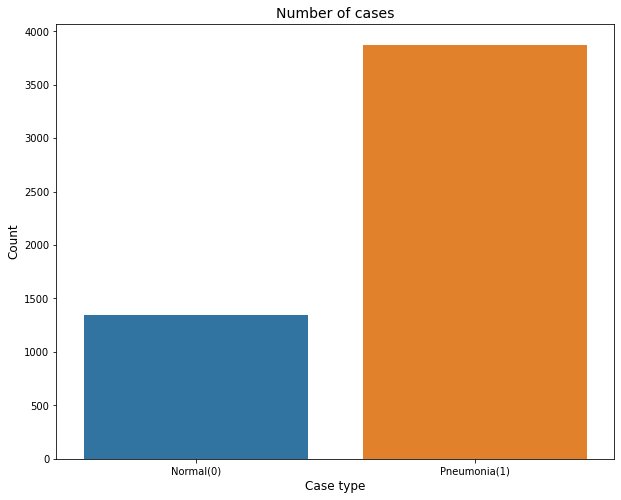

In [5]:
# Get the counts for each class
cases_count = train_data['label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Pneumonia(1)'])
plt.show()

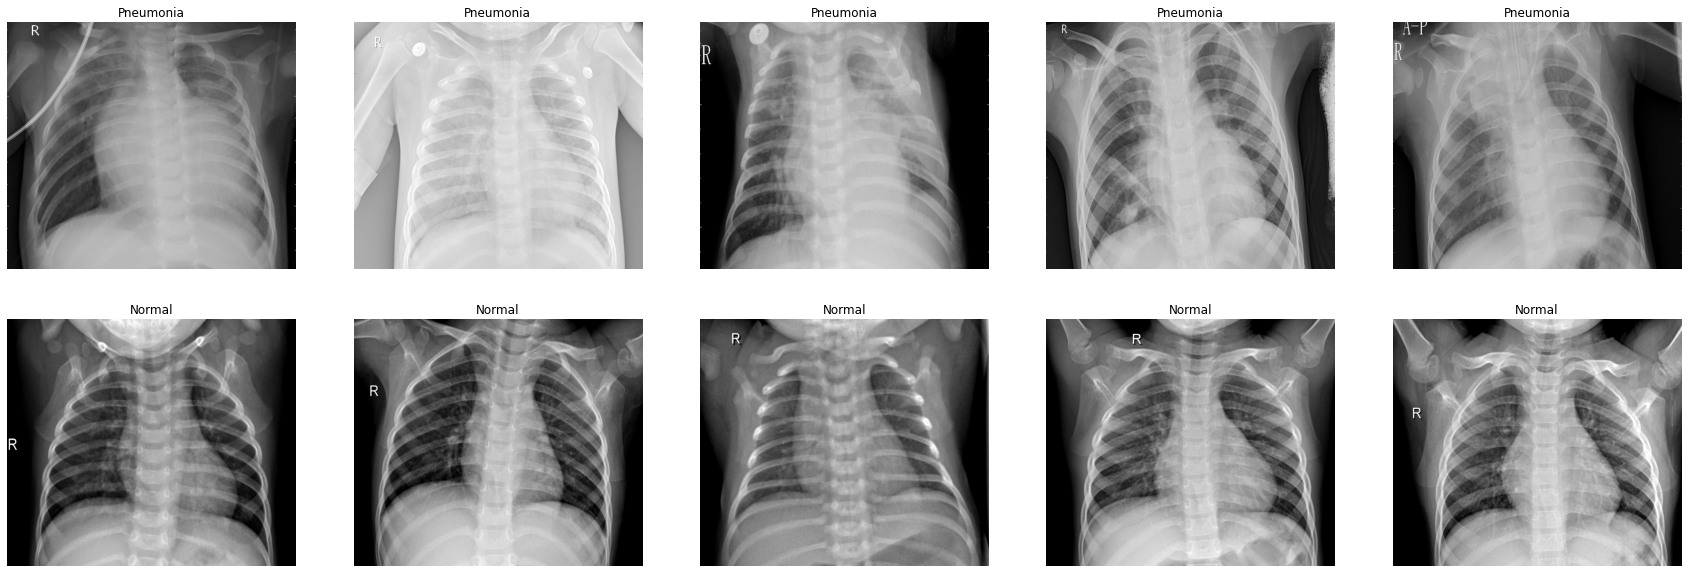

In [6]:
# Get few samples for both the classes
pneumonia_samples = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()
normal_samples = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()

# Concat the data in a single list and del the above two list
samples = pneumonia_samples + normal_samples
del pneumonia_samples, normal_samples

# Plot the data 
f, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Pneumonia")
    else:
        ax[i//5, i%5].set_title("Normal")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

# loading train image using cv2

In [7]:

train_normal = train_dir / 'NORMAL'
train_pnemonoia = train_dir / 'PNEUMONIA'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')
train_data = []
train_labels = []
from keras.utils.np_utils import to_categorical


for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = to_categorical(0, num_classes=2)
    train_data.append(img)
    train_labels.append(label)
                      
# Pneumonia cases        
for img in pneumonia_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = to_categorical(1, num_classes=2)
    train_data.append(img)
    train_labels.append(label)
    
# Convert the list into numpy arrays

train_data1 = np.array(train_data)
train_labels1 = np.array(train_labels)

print("Total number of validation examples: ", train_data1.shape)
print("Total number of labels:", train_labels1.shape)

Total number of validation examples:  (5216, 28, 28, 3)
Total number of labels: (5216, 2)


In [8]:
train_data1.shape

(5216, 28, 28, 3)

In [9]:
train_data1[1]

array([[[0.40392157, 0.40392157, 0.40392157],
        [0.27058824, 0.27058824, 0.27058824],
        [0.2627451 , 0.2627451 , 0.2627451 ],
        ...,
        [0.15294118, 0.15294118, 0.15294118],
        [0.23921569, 0.23921569, 0.23921569],
        [0.30196078, 0.30196078, 0.30196078]],

       [[0.59607843, 0.59607843, 0.59607843],
        [0.50588235, 0.50588235, 0.50588235],
        [0.3254902 , 0.3254902 , 0.3254902 ],
        ...,
        [0.34901961, 0.34901961, 0.34901961],
        [0.32156863, 0.32156863, 0.32156863],
        [0.58039216, 0.58039216, 0.58039216]],

       [[0.21176471, 0.21176471, 0.21176471],
        [0.45882353, 0.45882353, 0.45882353],
        [0.77254902, 0.77254902, 0.77254902],
        ...,
        [0.34509804, 0.34509804, 0.34509804],
        [0.34117647, 0.34117647, 0.34117647],
        [0.45490196, 0.45490196, 0.45490196]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.58039216, 0

# Train output file convert list to csv file 

In [10]:
train_labels1 = pd.DataFrame(train_labels1, columns=['no', 'label'],index=None)
y=train_labels1.drop('no',axis=1,inplace=True)

In [11]:
train_labels1

,label
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
5211,1.0
5212,1.0
5213,1.0
5214,1.0


# Preparing validation data

In [12]:
normal_case_dir=val_dir /'NORMAL'
pneumonia_cases_dir = val_dir / 'PNEUMONIA'
# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')
valid_data = []
valid_labels = []

normal_cases

<generator object Path.glob at 0x7fda3c619cd0>

In [13]:
valid_data = []
valid_labels = []
from keras.utils.np_utils import to_categorical


for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = to_categorical(0, num_classes=2)
    valid_data.append(img)
    valid_labels.append(label)
                      
# Pneumonia cases        
for img in pneumonia_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255.
    label = to_categorical(1, num_classes=2)
    valid_data.append(img)
    valid_labels.append(label)
    
# Convert the list into numpy arrays
valid_data1 = np.array(valid_data)
valid_labels1 = np.array(valid_labels)

print("Total number of validation examples: ", valid_data1.shape)
print("Total number of labels:", valid_labels1.shape)

Total number of validation examples:  (1349, 28, 28, 3)
Total number of labels: (1349, 2)


In [14]:
len(valid_data1)

1349

In [15]:
len(valid_labels1)

1349

In [16]:
valid_labels1 = pd.DataFrame(valid_labels1, columns=['no', 'label'],index=None)
y=valid_labels1.drop('no',axis=1,inplace=True)
#valid_labels

In [17]:
print(train_data1.shape)
print(train_labels1.shape)
print(valid_data1.shape)
print(valid_labels1.shape)

(5216, 28, 28, 3)
(5216, 1)
(1349, 28, 28, 3)
(1349, 1)


# Solving image dataset imbalance using SMOTE

In [18]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
train_rows=len(train_data1)
train_data1 = train_data1.reshape(train_rows,-1)
train_data2, train_labels2 = smt.fit_resample(train_data1, train_labels1)

0.0    3875
1.0    3875
Name: label, dtype: int64


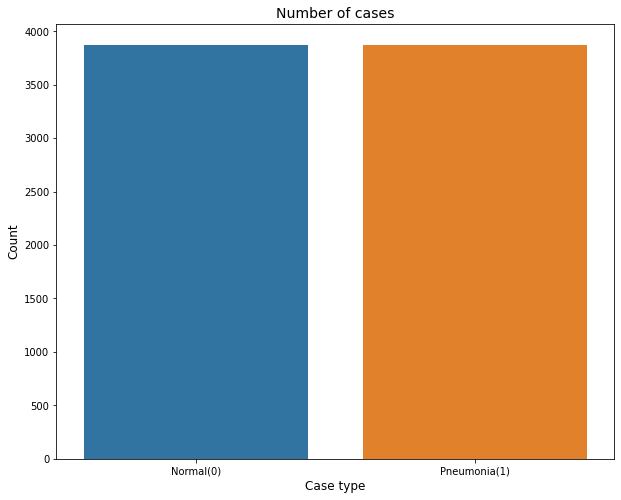

In [19]:
cases_count1 = train_labels2['label'].value_counts()
print(cases_count1)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count1.index, y= cases_count1.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Pneumonia(1)'])
plt.show()

In [20]:
train_data2.shape

(7750, 2352)

In [21]:
train_labels2.shape

(7750, 1)

In [22]:
train_labels2['label'].value_counts()

0.0    3875
1.0    3875
Name: label, dtype: int64

In [23]:
train_data2 =train_data2.reshape(-1,28,28,3)

In [24]:
#import imblearn
#from imblearn.over_sampling import RandomOverSampler
#oversample =  RandomOverSampler(random_state=42)
#train_data2, train_labels2 = oversample.fit_resample(train_data1, train_labels1)

# **Augmentation
Data augmentation is a powerful technique which helps in almost every case for improving the robustness of a model. But augmentation can be much more helpful where the dataset is imbalanced. You can generate different samples of undersampled class in order to try to balance the overall distribution.

In [25]:

from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(28,
                                  28,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

2022-07-04 14:01:25.402072: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-04 14:01:25.527423: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-04 14:01:25.528172: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-04 14:01:25.529371: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

# Create the model

In [26]:
import tensorflow as tf
from tensorflow.keras import  layers, models

model = models.Sequential([
    data_augmentation,
    layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 3)) ,
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu')
    
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 28)        784       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        16192     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 53,904
Trainable params: 53,904
Non-trainable params: 0
__________________________________________________

In [27]:
model.add(layers.Flatten())
model.add(layers.Dense(640, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(564, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='tanh'))

model.add(layers.Dense(64, activation='sigmoid'))

model.add(layers.Dense(2))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 28)        784       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        16192     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)              

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(np.array(train_data2), np.array(train_labels2), epochs=200, validation_data=(np.array(valid_data1), np.array(valid_labels1)))
#model.fit(np.array(train_data1), np.array(train_labels1), epochs=10)

2022-07-04 14:01:29.119156: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200


2022-07-04 14:01:30.871928: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


243/243 [==============================] - 9s 6ms/step - loss: 0.4202 - accuracy: 0.7846 - val_loss: 0.1808 - val_accuracy: 0.9370
Epoch 2/200
243/243 [==============================] - 1s 5ms/step - loss: 0.2237 - accuracy: 0.9098 - val_loss: 0.0769 - val_accuracy: 0.9837
Epoch 3/200
243/243 [==============================] - 1s 5ms/step - loss: 0.1872 - accuracy: 0.9245 - val_loss: 0.0938 - val_accuracy: 0.9644
Epoch 4/200
243/243 [==============================] - 1s 5ms/step - loss: 0.1675 - accuracy: 0.9386 - val_loss: 0.0743 - val_accuracy: 0.9726
Epoch 5/200
243/243 [==============================] - 2s 6ms/step - loss: 0.1508 - accuracy: 0.9428 - val_loss: 0.1117 - val_accuracy: 0.9637
Epoch 6/200
243/243 [==============================] - 1s 6ms/step - loss: 0.1495 - accuracy: 0.9431 - val_loss: 0.0637 - val_accuracy: 0.9830
Epoch 7/200
243/243 [==============================] - 1s 5ms/step - loss: 0.1460 - accuracy: 0.9446 - val_loss: 0.1600 - val_accuracy: 0.9392
Epoch 8/200

# Testing the a image with sample data

In [29]:

pic=[]
img = cv2.imread(str('../input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg'))
img = cv2.resize(img, (28,28))
if img.shape[2] ==1:
    img = np.dstack([img, img, img])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=np.array(img)
img = img/255
#label = to_categorical(0, num_classes=2)
pic.append(img)
#pic_labels.append(pneu)


im

In [30]:
pic1 = np.array(pic)

In [31]:
a=model.predict(pic1)
a

array([[-3.359089 ,  3.6210907]], dtype=float32)

In [32]:
a.argmax()

1

In [33]:
#datagen = ImageDataGenerator()
#datagen.fit(train)
#X_batch, y_batch = datagen.flow(X_train, y_train, batch_size=batch_size)
#model.fit_generator(datagen, samples_per_epoch=len(train), epochs=epochs)

In [34]:
#!mkdir -p saved_model
model.save('pnemonia_model1')

2022-07-04 14:06:59.353025: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [35]:
new_model = tf.keras.models.load_model('pnemonia_model1')

# Check its architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 28)        784       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        16192     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)              

In [36]:
a=new_model.predict(pic1)
a

array([[-3.359089 ,  3.6210907]], dtype=float32)

In [37]:
np.argmax(a)

1

In [38]:
!zip -r file.zip ./model

	zip warning: name not matched: ./model

zip error: Nothing to do! (try: zip -r file.zip . -i ./model)
